<a href="https://colab.research.google.com/github/dan-albuquerque/ML-aprendizado-semi-supervisionado/blob/main/aprendizado_semi_supervisionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise exploratoria

contexto: modelo pra definir qualidade de leite entre alta, media ou baixa (multiclasse)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data_bases_alura/qualidade_leite.csv')
df

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
4,6.6,37,0,0,0,0,255,média
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN
1057,6.8,43,1,0,1,0,250,NaN


In [ ]:
df['Qualidade'].value_counts(dropna=False)

NaN      635
baixa    184
média    149
alta      91
Name: Qualidade, dtype: int64

In [ ]:
df.describe().round(2)

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
count,1059.00,1059.00,1059.00,1059.00,1059.00,1059.00,1059.00
mean,6.63,44.23,0.55,0.43,0.67,0.49,251.84
std,1.40,10.10,0.50,0.50,0.47,0.50,4.31
min,3.00,34.00,0.00,0.00,0.00,0.00,240.00
25%,6.50,38.00,0.00,0.00,0.00,0.00,250.00
50%,6.70,41.00,1.00,0.00,1.00,0.00,255.00
75%,6.80,45.00,1.00,1.00,1.00,1.00,255.00
max,9.50,90.00,1.00,1.00,1.00,1.00,255.00


# Aprendizado supervisionado

In [ ]:
dados_rotulados = df.dropna()
dados_rotulados

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
4,6.6,37,0,0,0,0,255,média
6,5.5,45,1,0,1,1,250,baixa
7,4.5,60,0,1,1,1,250,baixa
...,...,...,...,...,...,...,...,...
1047,6.8,45,1,1,1,0,245,alta
1048,9.5,34,1,1,0,1,255,baixa
1049,6.5,37,0,0,0,0,255,média
1052,6.5,40,1,0,0,0,250,média


In [ ]:
x = dados_rotulados.drop('Qualidade', axis = 1)
y = dados_rotulados['Qualidade']
dados_rotulados['Qualidade'].value_counts(dropna=False)

baixa    184
média    149
alta      91
Name: Qualidade, dtype: int64

## Normalizando e mapeando os dados

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalizado = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_normalizado.head()


,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000
3,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667
4,0.230769,0.464286,0.0,1.0,1.0,1.0,0.666667


## Criando o modelo SVM

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
from sklearn.metrics import classification_report

y_previsto = svm.predict(x_teste)

y_previsto = svm.predict(x_teste)
resultados_svm = classification_report(y_teste, y_previsto)
print(resultados_svm)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106



# Aprendizado semi-supervisionado

## Pseudo labeling

In [ ]:
df[df['Qualidade'].isna()]

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
5,6.6,37,1,1,1,1,255,NaN
8,8.1,66,1,0,1,1,255,NaN
10,6.7,45,1,1,1,0,245,NaN
...,...,...,...,...,...,...,...,...
1053,8.1,66,1,0,1,1,255,NaN
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN


In [ ]:
dados_sem_rotulo = df[df['Qualidade'].isna()].drop('Qualidade', axis = 1)

dados_sem_rotulo_normalizados = pd.DataFrame(scaler.transform(dados_sem_rotulo), columns = dados_sem_rotulo.columns)

y_previsto = svm.predict(dados_sem_rotulo_normalizados)
y_previsto # o modelo fez as previsoes pra encher os linhas sem rotulos

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,

In [ ]:
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
novo_y_treino = pd.concat([pd.Series(y_treino), pd.Series(y_previsto)], ignore_index = True)

pseudo_labeling = SVC(kernel = 'linear', random_state = 10)
pseudo_labeling.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
novo_y_previsto = pseudo_labeling.predict(x_teste)
resultados_pseudo_labeling = classification_report(y_teste, novo_y_previsto)

print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Pseudo Labeling')
print(resultados_pseudo_labeling)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.66      0.87      0.75        46
           2       0.88      0.76      0.81        37

    accuracy                           0.73       106
   macro avg       0.74      0.67      0.69       106
weighted avg       0.74      0.73      0.72       106



# Self Training

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
probabilidades = svm.predict_proba(dados_sem_rotulo_normalizados)
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

tabela_resultados = pd.DataFrame(probabilidades, columns = ['Prob C0', 'Prob C1', 'Prob C2'])# probabilidade de ser da classe 0, 1, 2
tabela_resultados['Previsão'] = y_previsto
# probabilidade maxima de ser da classe prevista(se a probabilidade de ser a classe x for a maior, vai exibir a classe x)
tabela_resultados['Probabilidade máxima'] = tabela_resultados[['Prob C0', 'Prob C1', 'Prob C2']].max(axis = 1)

tabela_resultados

,Prob C0,Prob C1,Prob C2,Previsão,Probabilidade máxima
0,0.147210,0.852259,0.000531,1,0.852259
1,0.249874,0.715117,0.035009,1,0.715117
2,0.491701,0.506534,0.001764,1,0.506534
3,0.076294,0.922552,0.001155,1,0.922552
4,0.693914,0.215723,0.090363,0,0.693914
...,...,...,...,...,...
630,0.076294,0.922552,0.001155,1,0.922552
631,0.130915,0.459888,0.409197,1,0.459888
632,0.540366,0.195320,0.264314,0,0.540366
633,0.255691,0.743873,0.000436,1,0.743873


## Filtrando o data frame

selecioando previsoes com probabilidades acima de 75%

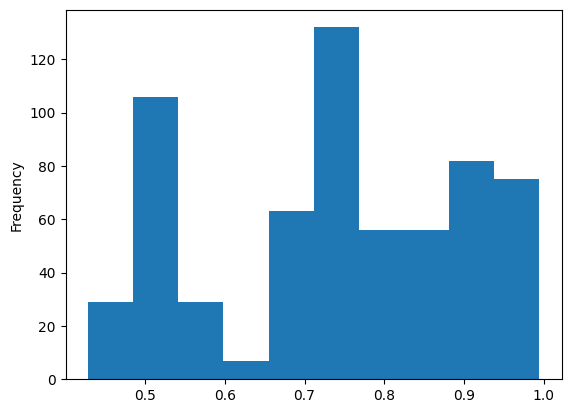

In [ ]:
tabela_resultados['Probabilidade máxima'].plot(kind='hist');

In [ ]:
filtro_confianca = tabela_resultados['Probabilidade máxima'] > 0.75

novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados[filtro_confianca]])

novo_y_treino = pd.concat([pd.Series(y_treino), tabela_resultados.loc[filtro_confianca, 'Previsão']])

In [ ]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)

svm.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
novo_y_previsto = svm.predict(x_teste)
resultados_self_training1 = classification_report(y_teste, novo_y_previsto)

print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106



## Utilizando o SelfTrainingClassifier

In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier

pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0]) # como susbtituir os valores sem rotulo por -1,  pra se encaixar no modelo do SelfTrainingClassifier

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
630   -1
631   -1
632   -1
633   -1
634   -1
Length: 635, dtype: int64

In [ ]:
x_treino_self_training = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
y_treino_self_training = pd.concat([pd.Series(y_treino), pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])], ignore_index = True)
y_treino_self_training

0      2
1      2
2      2
3      0
4      0
      ..
948   -1
949   -1
950   -1
951   -1
952   -1
Length: 953, dtype: int64

In [ ]:
svm = SVC(kernel = 'linear', probability= True, random_state = 10)
self_training = SelfTrainingClassifier(svm, threshold = 0.80, max_iter = 15, verbose = False)

self_training.fit(x_treino_self_training, y_treino_self_training)

In [ ]:
y_previsto = self_training.predict(x_teste)
resultados_self_training = classification_report(y_teste, y_previsto)

print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)


SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0   

# Label Propagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation

label_propagation = LabelPropagation()

label_propagation.fit(x_treino_self_training, y_treino_self_training)

LabelPropagation()

In [ ]:
y_previsto = label_propagation.predict(x_teste)

resultados_label_propagation = classification_report(y_teste, y_previsto)

print('SVM Self Training')
print(resultados_self_training)
print('-'*50)
print('Label Propagation')
print(resultados_label_propagation)

SVM Self Training
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.81      0.91      0.86        46
           2       0.92      0.89      0.90        37

    accuracy                           0.85       106
   macro avg       0.85      0.82      0.83       106
weighted avg       0.85      0.85      0.85       106

--------------------------------------------------
Label Propagation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.89      0.94        46
           2       0.88      0.95      0.91        37

    accuracy                           0.93       106
   macro avg       0.93      0.95      0.94       106
weighted avg       0.94      0.93      0.93       106



# Armazenando e testando o modelo final(label propagation)

In [ ]:
import pickle

with open('min_max_scaler.pkl', 'wb') as arquivo:
  pickle.dump(scaler, arquivo)

with open('modelo_label_propagation.pkl', 'wb') as arquivo:
  pickle.dump(label_propagation, arquivo)

In [ ]:
modelo_min_max = pd.read_pickle('/content/min_max_scaler.pkl')

modelo_label_propagation = pd.read_pickle('/content/modelo_label_propagation.pkl')

In [ ]:
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
}

novo_dado = pd.DataFrame(novo_dado)

novo_dado = modelo_min_max.transform(novo_dado)

modelo_label_propagation.predict(novo_dado)
label_encoder.inverse_transform([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(


array(['alta'], dtype=object)

# Exercicios

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/data_bases_alura/dados_diabetes.csv')
dados.head()

,glicemia,pressao_sanguinea,dobra_cutanea_triceps,insulina,imc,idade,diabetes
0,89,66,23,94,28.1,21,NaN
1,137,40,35,168,43.1,33,NaN
2,78,50,32,88,31.0,26,sim
3,197,70,45,543,30.5,53,NaN
4,189,60,23,846,30.1,59,sim


In [ ]:
dados.describe().round(1)

,glicemia,pressao_sanguinea,dobra_cutanea_triceps,insulina,imc,idade
count,394.0,394.0,394.0,394.0,394.0,394.0
mean,122.3,70.7,29.1,155.5,33.0,30.8
std,31.4,12.5,10.5,118.8,7.2,10.2
min,0.0,24.0,7.0,14.0,0.0,21.0
25%,99.0,62.0,21.0,76.2,28.3,23.0
50%,119.0,70.0,29.0,125.0,33.2,27.0
75%,143.0,78.0,36.8,190.0,37.1,36.0
max,198.0,110.0,63.0,846.0,67.1,81.0


In [ ]:
dados_rotulados = dados.dropna()

x = dados_rotulados.drop('diabetes', axis = 1)
y = dados_rotulados['diabetes']

In [ ]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
x_normalizado = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

svm = SVC(kernel = 'linear', random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
y_previsto = svm.predict(x_teste)
resultados_svm = classification_report(y_teste, y_previsto)
print(resultados_svm)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67



In [ ]:
dados_sem_rotulo = dados[dados['diabetes'].isna()].drop('diabetes', axis = 1)

dados_sem_rotulo_normalizados = pd.DataFrame(scaler.transform(dados_sem_rotulo), columns = dados_sem_rotulo.columns)

y_previsto = svm.predict(dados_sem_rotulo_normalizados)

novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
novo_y_treino = pd.concat([pd.Series(y_treino), pd.Series(y_previsto)], ignore_index = True)

pseudo_labeling = SVC(kernel = 'linear', random_state = 10)
pseudo_labeling.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
novo_y_previsto = pseudo_labeling.predict(x_teste)
resultados_pseudo_labeling = classification_report(y_teste, novo_y_previsto)

print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Pseudo Labeling')
print(resultados_pseudo_labeling)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.94      0.65      0.77        23

    accuracy                           0.87        67
   macro avg       0.89      0.81      0.84        67
weighted avg       0.88      0.87      0.86        67



In [ ]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
probabilidades = svm.predict_proba(dados_sem_rotulo_normalizados)
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

tabela_resultados = pd.DataFrame(probabilidades, columns = ['Prob C0', 'Prob C1'])
tabela_resultados['Previsão'] = y_previsto
tabela_resultados['Probabilidade máxima'] = tabela_resultados[['Prob C0', 'Prob C1']].max(axis = 1)

In [ ]:
filtro_confianca = tabela_resultados['Probabilidade máxima'] > 0.75

novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados[filtro_confianca]])
novo_y_treino = pd.concat([pd.Series(y_treino), tabela_resultados.loc[filtro_confianca, 'Previsão']])

In [ ]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
novo_y_previsto = svm.predict(x_teste)
resultados_self_training1 = classification_report(y_teste, novo_y_previsto)
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67



In [ ]:
x_treino_self_training = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)

y_treino_self_training = pd.concat([pd.Series(y_treino), pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])], ignore_index = True)

In [ ]:
svm = SVC(kernel = 'linear', probability= True, random_state = 10)
self_training = SelfTrainingClassifier(svm, threshold = 0.80, max_iter = 15, verbose = True)
self_training.fit(x_treino_self_training, y_treino_self_training)

End of iteration 1, added 58 new labels.
End of iteration 2, added 11 new labels.
End of iteration 3, added 4 new labels.
End of iteration 4, added 1 new labels.
End of iteration 5, added 1 new labels.
End of iteration 6, added 1 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [ ]:
y_previsto = self_training.predict(x_teste)
resultados_self_training = classification_report(y_teste, y_previsto)

print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.94      0.65      0.77        23

    accuracy  